<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
missing_values = ["n/a", "na", "--"]  #capture these inputs as null values as an extra precaution
house = pd.read_csv('./housing.csv', na_values = missing_values)

In [3]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
print(house.shape)  # there are 1460 rows and 81 features(columns) in our raw dataset
print(house.info())  #Looking through the data types of each column...

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [6]:
df = house.copy()  #make a copy of original dataframe
# df.MSZoning.value_counts()
residential_cols = ['FV','RH','RL','RP','RM'] 
df = df[df.MSZoning.isin(residential_cols)]  #df only contains residential pptys now

In [7]:
df.shape

(1450, 81)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
int64

C:\Users\Jit Nung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


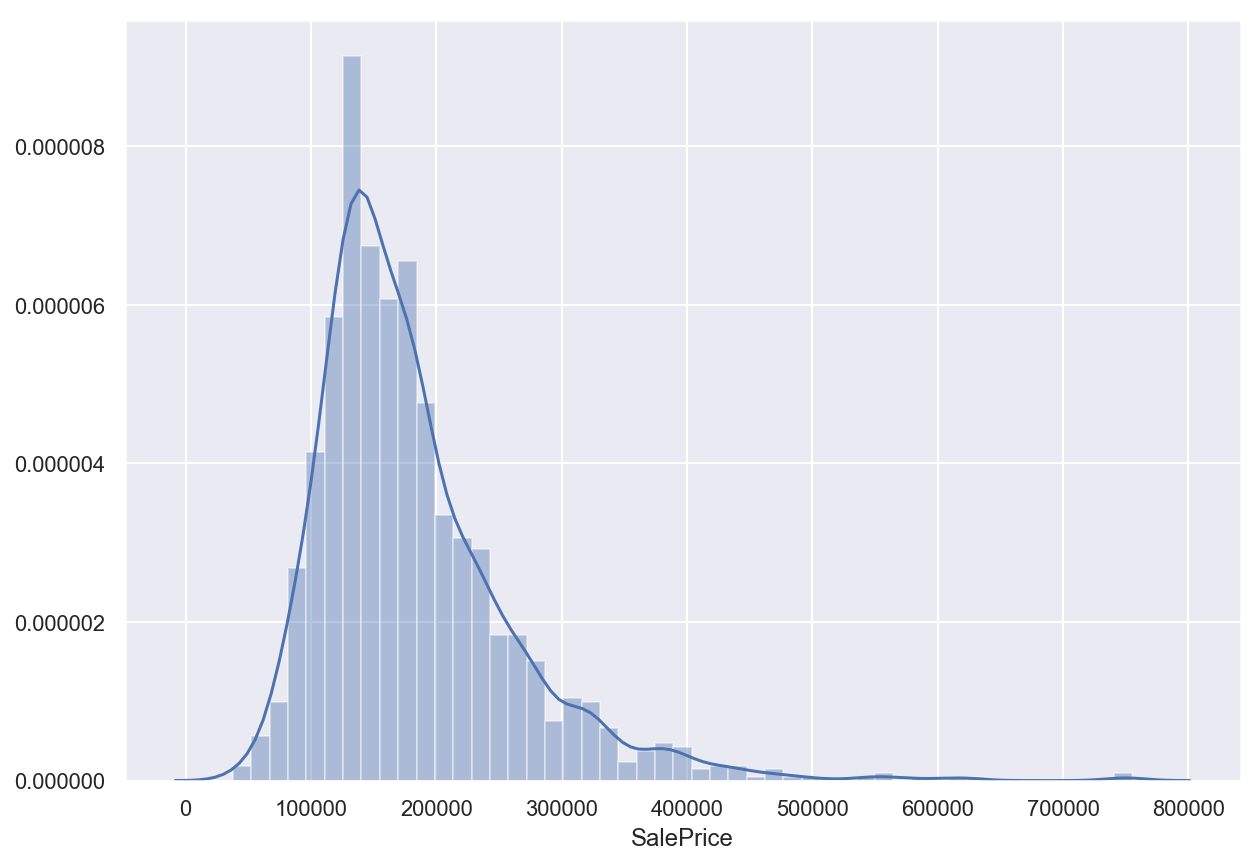

In [8]:
print(df[df.SalePrice < 0]) # No abnormal sale prices, that's good!
print(df.SalePrice.dtypes)  # Saleprice is int type

#taking a look at the distribution of Saleprice
sns.set(rc={"figure.figsize": (10, 7)})
sns.distplot(df.SalePrice)
#seems like it's right skewed, and mean price around $150k

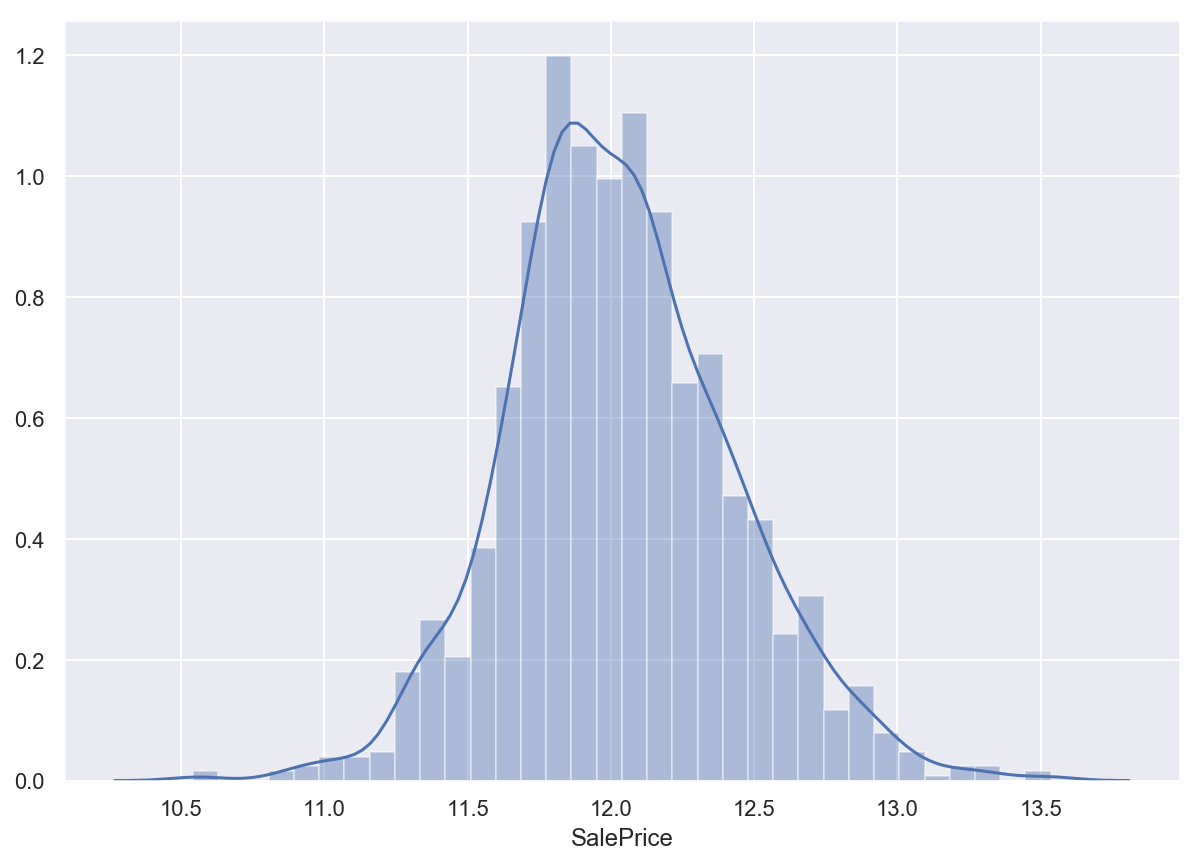

In [9]:
#log transforming Saleprice seems to give us closer to normal distribution
sns.set(rc={"figure.figsize": (10, 7)})
log_price = np.log(df.SalePrice)
sns.distplot(log_price)

In [10]:
df.columns  #take a look at our columns/features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.apply(lambda c: (c.replace(['Unknown', 'None', ''], np.nan).notna().sum() / c.size) * 100)  
#percentage of column that has values other than null. 

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.137931
LotArea          100.000000
Street           100.000000
Alley              6.137931
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
MasVnrType        40.551724
MasVnrArea        99.448276
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
                    ...    
BedroomAbvGr     100.000000
KitchenAbvGr     100.000000
KitchenQual      100.000000
TotRmsAbvGrd     100.000000
Functional       100

In [12]:
#Let's screen out what we want for our predicted variable 
#keep only features that are fixed (and exclude renovatables & time-related columns)
#we will keep 'YrSold' for now so we can have a similar holdout set
d1 = pd.concat([df.iloc[:,1:16],df.iloc[:,29:31]], axis=1)
d2 = pd.concat([d1,df.iloc[:,38]],axis =1)
d3 = pd.concat([d2,df.iloc[:,43:45]],axis =1)
d4 = pd.concat([d3,df.iloc[:,46:53]],axis =1)
d5 = pd.concat([d4,df.iloc[:,[54,58,62]]],axis =1)
d6 = pd.concat([d5,df.iloc[:,66:72]],axis =1)

x = pd.concat([d6,df.iloc[:,[75,77]]],axis =1)
x.columns   #contains all the fixed featues we are working with

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'Foundation',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageType', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

In [13]:
#assessing the selected predictor variables in general
x.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Attchd,548,0,61,0,0,0,0,0,2008
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,Attchd,460,298,0,0,0,0,0,0,2007
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Attchd,608,0,42,0,0,0,0,0,2008
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Detchd,642,0,35,272,0,0,0,0,2006
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,Attchd,836,192,84,0,0,0,0,0,2008
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Attchd,480,40,30,0,320,0,0,700,2009
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Attchd,636,255,57,0,0,0,0,0,2007
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Attchd,484,235,204,228,0,0,0,350,2009
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Detchd,468,90,0,205,0,0,0,0,2008
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Attchd,205,0,4,0,0,0,0,0,2008


In [14]:
#inspecting for null values
x.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1361
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
Foundation          0
BsmtQual           37
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageType         79
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
YrSold              0
dtype: int64

In [15]:
#let's deal with the respective features with null values

#Since lotfrontage is the linear feet of street connected to property, we can safely assume that the 
#NA ones have no frontage
x.LotFrontage.fillna(0,inplace=True)
#likewise for Alley, it's safe to assume NA are those with no alley access
x.Alley.fillna("No Access", inplace=True)
#Since it's clear that NA in BsmtQual (height of bsmt) are those with no basement, let's replace it
x.BsmtQual.fillna("No Bsmt", inplace=True)
#Likewise for garage type - NA = no garage
x.GarageType.fillna("No Grg", inplace=True)

# x.isnull().sum()  #checking

In [16]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'Foundation',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageType', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

In [17]:
 #let's check out possible categorical columns 
[c for c in x if x[c].unique().size < 50] 

# BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd' all
#have numerical meanings - hence we won't be dummifying them
# We would also exclde 3SsnPorhc, PoolArea and MiscVal for dummifying as they are continuous variables

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'Foundation',
 'BsmtQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageType',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [18]:
#whack all categoricals into dummies
X = pd.get_dummies(x, columns=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',
                           'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                           'Condition2','BldgType','Foundation','BsmtQual','GarageType'],
               drop_first=True)
X.head()

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Grg
0,65.0,8450,856,856,854,1710,1,0,2,1,...,0,1,0,0,1,0,0,0,0,0
1,80.0,9600,1262,1262,0,1262,0,1,2,0,...,0,1,0,0,1,0,0,0,0,0
2,68.0,11250,920,920,866,1786,1,0,2,1,...,0,1,0,0,1,0,0,0,0,0
3,60.0,9550,756,961,756,1717,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,1145,1145,1053,2198,1,0,2,1,...,0,1,0,0,1,0,0,0,0,0


In [19]:
#take out pptys transacted in 2010
X_test = X[X['YrSold'] == 2010].drop(columns='YrSold')
y_test = df[df['YrSold'] == 2010].SalePrice


In [20]:
#set X as subset of datraframe
X_pre2010 = X[X['YrSold'] <2010]
X_fixed = X_pre2010.drop(columns=['YrSold'])

#set y as subset of dataframe
y = df[df['YrSold'] < 2010].SalePrice

print(X_fixed.shape)
print(y.shape)
# now both predictor and target variables are in order! # wowie - we've got 109 features! 
#perhaps we could consider lasso to help us trim down for relevant features~

(1278, 112)
(1278,)


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xstd = ss.fit_transform(X_fixed)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
#let's explore a few feature selection methods
# First - RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  #using linreg as estimator
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(Xstd, y)

print(selector.support_) #list of our final features in boolean
print(selector.ranking_) #rank features, where 4 is removed, followed by 3 then 2. Keep the Rank 1 features!
rfecv_columns = np.array(list(X_fixed.columns))[selector.support_] 
rfecv_columns

[False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False False False  True False False False False False
  True  True False False False False  True  True  True False False False
 False False False False False False  True False  True False  True False
  True False False False False  True False False  True False False False
  True False  True  True  True  True False  True  True  True  True  True
  True False  True  True False False  True False False False False False
 False False False False False  True False False False False False False
 False False  True False False False  True  True  True  True  True  True
  True False  True  True]
[30  1  1  1  1 15  1  1  1  1  1  1  1  1  1 60 63 21  1 58 45 13 50 48
  1  1  7 16 34 52  1  1  1 54 32 46 53 23 20 27 26 25  1 62  1  3  1  4
  1 19 39 33 29  1 38 24  1  6 10 22  1  9  1  1  1  1 42  1  1  1  1  1
  1 11  1  1 12 56  1 40 49 41  8 43 59 47 35 36 17  1 28 61 37 31  2 14
 18  5  1 51 57 44  1  1 

array(['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       'ScreenPorch', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition2_PosN', 'Foundation_PConc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Bsmt', 'BsmtQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_Buil

In [23]:
# Try LassoCV
from sklearn.linear_model import LassoCV
lacv = LassoCV(cv=10, random_state=0).fit(Xstd, y)
print(lacv.score(Xstd,y))

lacv_coefs = pd.DataFrame({'variable':X_fixed.columns,
                            'coef':lacv.coef_,
                            'abs_coef':np.abs(lacv.coef_)})
print(lacv_coefs.sort_values('abs_coef',ascending=False))


0.8424086047414236
                 variable          coef      abs_coef
5               GrLivArea  25504.372362  25504.372362
105           BsmtQual_TA -20809.533157  20809.533157
103           BsmtQual_Gd -18676.490053  18676.490053
69   Neighborhood_NridgHt  12645.323149  12645.323149
68   Neighborhood_NoRidge  10419.625487  10419.625487
75   Neighborhood_StoneBr   7601.916014   7601.916014
11           KitchenAbvGr  -7372.109467   7372.109467
102           BsmtQual_Fa  -7048.090448   7048.090448
13             GarageArea   6953.310032   6953.310032
2             TotalBsmtSF   6845.371915   6845.371915
74   Neighborhood_Somerst   6560.380645   6560.380645
8                FullBath   6503.488267   6503.488267
104      BsmtQual_No Bsmt  -5764.497975   5764.497975
6            BsmtFullBath   5739.329639   5739.329639
10           BedroomAbvGr  -5341.606089   5341.606089
60   Neighborhood_Edwards  -4854.032587   4854.032587
89        Condition2_PosN  -4842.891512   4842.891512
32       

In [24]:
#Actually, let's just use ElasticNetCV to help us select the 'best' penalty and respective alpha

from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score

l1_ratios = np.linspace(0.01, 1.0, 25)
enet_reg = ElasticNetCV(l1_ratio=l1_ratios, 
                            n_alphas=30, 
                            cv=10, 
                            max_iter=10000)
enet_reg.fit(Xstd, y)
print(enet_reg.alpha_)     #gives optimal alpha
print(enet_reg.l1_ratio_)  #optimal l1 ratio is 1 - thus pure lasso penalty.

#using the optimal alphas and l1 ratio
enet= ElasticNet(alpha=enet_reg.alpha_, 
                  l1_ratio=enet_reg.l1_ratio_)
enet.fit(Xstd,y)

enet_scores = cross_val_score(enet, Xstd, y, cv=10)
print(np.mean(enet_scores))   #0.79 not too bad! Let's try it on holdout set

477.7237066964601
1.0
0.7911411883851768


In [25]:
#See how our model works on test set
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xstd_test = ss.fit_transform(X_test)

enet.score(Xstd_test,y_test)   
# R_sq score of 0.86 is not too shabby! Our model does fairly well in predicting house value!

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.8667340245307059

In [26]:
enet_coefs = pd.DataFrame({'variable':X_fixed.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})
print(enet_coefs.sort_values('abs_coef',ascending=False))

# Among the fixed features, size of living area (GrLivArea), type of Neighbourhood,
#Basement height and number of kitchens to garage area are strong predictors 

                 variable          coef      abs_coef
5               GrLivArea  25391.774003  25391.774003
105           BsmtQual_TA -21186.640490  21186.640490
103           BsmtQual_Gd -19120.464755  19120.464755
69   Neighborhood_NridgHt  12651.089516  12651.089516
68   Neighborhood_NoRidge  10493.844121  10493.844121
75   Neighborhood_StoneBr   7637.308453   7637.308453
11           KitchenAbvGr  -7355.448657   7355.448657
102           BsmtQual_Fa  -7181.693440   7181.693440
13             GarageArea   6830.904431   6830.904431
2             TotalBsmtSF   6650.725966   6650.725966
74   Neighborhood_Somerst   6649.836868   6649.836868
8                FullBath   6527.322233   6527.322233
104      BsmtQual_No Bsmt  -5981.057519   5981.057519
6            BsmtFullBath   5761.050182   5761.050182
10           BedroomAbvGr  -5447.970930   5447.970930
60   Neighborhood_Edwards  -4921.565830   4921.565830
89        Condition2_PosN  -4891.630735   4891.630735
1                 LotArea   

In [27]:
y_pred = enet.predict(Xstd_test)
residual = y_test - y_pred
residual

16      -1183.182383
24      12403.431380
26       1731.739362
27     -25522.562490
33     -20909.988236
38     -16903.731944
45        772.968255
52      18222.838057
63     -10717.284557
66     -76052.351907
68       2431.570770
73       1201.324670
74       7059.736277
78      -9630.728662
98       -284.701460
99     -13934.741379
100      -516.015460
101    -13368.087981
103     12244.109456
109    -20626.621888
111      1782.249611
118        30.290875
140     28251.159937
142     23335.541934
147     -7502.929861
157      7084.300384
158      2659.993580
162    -41089.932946
171     14233.335938
200     -7115.249197
            ...     
1242     5289.720223
1247    25027.593668
1250    -1926.379453
1267    55705.152513
1270    44631.750936
1283    13488.294243
1284   -32765.761016
1286   -11931.101587
1290    17040.576986
1299    -3055.382812
1310    70887.532933
1313    -8421.766108
1322   -89343.708216
1353    29576.152483
1357    -8467.168789
1358     2961.222841
1365   -22514

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [28]:
#let's build a model that contains both fixed and renovatable features - see how accurate we get!
#fixed features
fixed_features = list(x.columns)
fixed_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'Foundation',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageType',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [29]:
#Let's screen out features that are renovatable (and exclude fixed & time-related columns)
#similarly we will exclude time related columns and keep YrSold for now
r0 =pd.concat([df.iloc[:,16:19],df.iloc[:, 21:29]], axis=1)
r1 = pd.concat([r0,df.iloc[:, 31:38]], axis=1)
r2 = pd.concat([r1,df.iloc[:,39:43]],axis =1)
r3 = pd.concat([r2,df.iloc[:,[45,53,]]],axis =1)
r4 = pd.concat([r3,df.iloc[:,55:58]],axis =1)
r5 = pd.concat([r4,df.iloc[:,59:62]],axis =1)
r6 = pd.concat([r5,df.iloc[:,63:66]],axis =1)
r7 = pd.concat([r6,df.iloc[:,72:75]],axis =1)

x_reno = pd.concat([r7, df.iloc[:,77]], axis=1)
x_reno.head()

,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold
0,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,2003.0,RFn,2,TA,TA,Y,NaN,NaN,NaN,2008
1,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,1976.0,RFn,2,TA,TA,Y,NaN,NaN,NaN,2007
2,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,2001.0,RFn,2,TA,TA,Y,NaN,NaN,NaN,2008
3,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,1998.0,Unf,3,TA,TA,Y,NaN,NaN,NaN,2006
4,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,2000.0,RFn,3,TA,TA,Y,NaN,NaN,NaN,2008


In [30]:
x_reno.columns

Index(['HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'YrSold'],
      dtype='object')

In [31]:
#Since GarageArea is already represnted in fixed features, we take out GarageCars (size
#of garage in car capacity) to avoid multicollinearity problem

x_reno.drop(columns=['GarageYrBlt','GarageCars'],inplace=True)

In [32]:
#inspecting for null values
x_reno.isnull().sum()

HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
LowQualFinSF       0
KitchenQual        0
Functional         0
Fireplaces         0
FireplaceQu      681
GarageFinish      79
GarageQual        79
GarageCond        79
PavedDrive         0
PoolQC          1443
Fence           1172
MiscFeature     1398
YrSold             0
dtype: int64

In [33]:
#Let's deal with the null values present in x_reno

#For Masonry Veneer type, NA are those with no veneer, which will have no Masonry area values too
x_reno.MasVnrType.fillna("No Veneer", inplace=True)
x_reno.MasVnrArea.fillna(0, inplace=True)

#For the single null value in 'Electrical', let's fill it with the mean value
x_reno.Electrical.fillna("SBrkr", inplace= True)

#Looking at the Bsmt values, NA are those with no basement, let's replace it with "No Bsmt"
for col in x_reno.filter(regex='Bsmt'):
    x_reno[col].fillna("No Bsmt", inplace=True)
    
#Similarly, for Garage values, NA are those with no garage, let's repalce it
for col in x_reno.filter(regex='Garage'):
    x_reno[col].fillna("No Garage", inplace=True)
    
#For FireplaceQu, PoolQC & Fence, NA are those with no said facilty. 
x_reno.FireplaceQu.fillna("No Fireplace", inplace=True)
x_reno.PoolQC.fillna("No Pool", inplace=True)
x_reno.Fence.fillna("No Fence", inplace=True)

#For Misc Feature, NA are those with no misc features
x_reno.MiscFeature.fillna("None",inplace=True)

x_reno.isnull().sum() #checking

HouseStyle      0
OverallQual     0
OverallCond     0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
LowQualFinSF    0
KitchenQual     0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
PoolQC          0
Fence           0
MiscFeature     0
YrSold          0
dtype: int64

In [34]:
x_reno.head()

,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,Fireplaces,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold
0,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,No Fireplace,RFn,TA,TA,Y,No Pool,No Fence,None,2008
1,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,1,TA,RFn,TA,TA,Y,No Pool,No Fence,None,2007
2,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,1,TA,RFn,TA,TA,Y,No Pool,No Fence,None,2008
3,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,1,Gd,Unf,TA,TA,Y,No Pool,No Fence,None,2006
4,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,1,TA,RFn,TA,TA,Y,No Pool,No Fence,None,2008


In [35]:
# Next, let's check out possible categorical columns 
[c for c in x_reno if x_reno[c].unique().size < 20] 

#we can exclude Fireplaces as it has direct numerical interpretation
X_reno = pd.get_dummies(x_reno, 
                        columns=['HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
                                    'Exterior1st','Exterior2nd','MasVnrType', 'ExterQual','ExterCond',
                                    'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                    'HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                    'FireplaceQu','GarageFinish','GarageQual','GarageCond',
                                    'PavedDrive','PoolQC','Fence','MiscFeature'], drop_first=True)
X_reno.head()
X_reno.drop(columns=['YrSold'],inplace=True)

In [36]:
#combining the fixed and reno features together
X_mix = pd.concat([X,X_reno],axis=1)
X_mix.isnull().sum().sum()  #checking if all's good

0

In [37]:
X_mix.shape

(1450, 269)

In [38]:
#Setting aside test set
X_test = X_mix[X_mix.YrSold == 2010].drop(columns=['YrSold'])
ymix_test = df[df['YrSold'] == 2010].SalePrice

print(X_test.shape)
print(y_test.shape)

(172, 268)
(172,)


In [39]:
#set training y and x as subset of dataframe
y = df[df['YrSold'] < 2010].SalePrice
X_train = X_mix[X_mix['YrSold'] < 2010].drop(columns=['YrSold'])

print(X_train.shape)
print(y.shape)
# now both predictor and target variables are in order! # wowie - we've got some bloated 268 features! 

(1278, 268)
(1278,)


In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X_train)

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
#let's try ElasticNetCV to help us select the 'best' penalty and respective alpha
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score

l1_ratios = np.linspace(0.01, 1.0, 25)
enet_reg = ElasticNetCV(l1_ratio=l1_ratios, 
                            n_alphas=30, 
                            cv=10, 
                            max_iter=10000)
enet_reg.fit(Xs, y)
print(enet_reg.alpha_)     #gives optimal alpha
print(enet_reg.l1_ratio_)  #optimal l1 ratio is 1 - thus pure lasso penalty.

#using the optimal alphas and l1 ratio for fitting
enet= ElasticNet(alpha=enet_reg.alpha_, 
                  l1_ratio=enet_reg.l1_ratio_)
enet.fit(Xs,y)

enet_scores = cross_val_score(enet, Xs, y, cv=10)
print(np.mean(enet_scores))   #0.814 not too bad! 

1238.7107221517526
1.0
0.8149373253180203


In [42]:
#See how our model works on test set
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_test = ss.fit_transform(X_test)
enet.score(Xs_test,ymix_test)   

C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jit Nung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.8787254329833055

In [43]:
X_reno.columns

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'Fireplaces', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       ...
       'PoolQC_Gd', 'PoolQC_No Pool', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'Fence_No Fence', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object', length=156)

In [44]:
enet_coefs = pd.DataFrame({'variable':X_test.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})
#Let's take a look at all the reno features, starting with most impt
enet_coefs[(enet_coefs.abs_coef > 0) & (enet_coefs['variable'].isin(X_reno.columns))]\
.sort_values('coef',ascending=False)

,variable,coef,abs_coef
132,OverallQual_9,13196.251433,13196.251433
133,OverallQual_10,12596.760282,12596.760282
131,OverallQual_8,8207.719660,8207.719660
198,BsmtExposure_Gd,3756.597539,3756.597539
153,RoofMatl_WdShngl,3595.821341,3595.821341
203,BsmtFinType1_GLQ,2982.759651,2982.759651
236,Functional_Typ,2881.589535,2881.589535
117,Fireplaces,2459.417630,2459.417630
156,Exterior1st_BrkFace,1818.273846,1818.273846
139,OverallCond_7,1604.901033,1604.901033


Seems like a strong quality of overall material and finish of a house has the largest effect. With an excellent (OverallQual_9) quality fetching a cool $13k more to a house on average.

In [45]:
ymix_pred = enet.predict(Xs_test) #with reno features
np.round(ymix_pred - y_pred, 4)

array([  2833.5651,   1105.7785,   2916.3408, -36637.1773,   5775.2507,
        14266.7146,   8676.9327,  37241.7949, -12644.11  , -13967.4879,
        -3761.3458,  -3715.3889,  39197.4005,  -9105.8607,   8246.1011,
       -14446.2982,  -1056.3327,   2539.9402, -11923.7723,  -4808.5365,
        -3986.0172, -12267.9718,  16482.9488,   5892.0129,   -934.9812,
       -13796.6872,  -8862.2768, -17413.2364,  20355.0867, -15848.2476,
        11774.2049,  10674.7726,  20273.909 ,  -5086.8122, -16937.8187,
         2290.8675,  14158.4873, -12090.7145,   8511.8387,   7868.7689,
         3791.8625, -10269.9177, -12303.6371, -18947.2366,  21978.042 ,
       -29127.1429,  -3550.7808,   3621.2382,   5163.3947,  16674.2687,
        -2324.4371,   6854.9949,  -6400.727 ,  -1869.7288, -10557.0115,
         4064.5859,  32505.3329,  37143.3792,   -610.2674, -58048.3889,
         3620.0429,   1671.381 , -11670.3389,  -2247.4107, -32007.0058,
         5431.5024,  30175.354 , -17154.9152, -14463.7547, -2507

For the positive values, it shows the existing renovatable features of the house actually had a positive effect on overall saleprice. For these houses, if we can get them at the price of just their fixed characteristics (y_pred), we should buy it!

For the negative values, it seems that the existing reno features actually brought down the overall saleprice. However, we should not neglect them! Improving the quality of material and finish, improving the basement exposure or even a mere change in the roof material can give us huge upsides! We just need take into consideration the renovation/labor costs required. 

In [46]:
#original residuals from fixed model's prediction
print(residual)
# np.std(residual)

16      -1183.182383
24      12403.431380
26       1731.739362
27     -25522.562490
33     -20909.988236
38     -16903.731944
45        772.968255
52      18222.838057
63     -10717.284557
66     -76052.351907
68       2431.570770
73       1201.324670
74       7059.736277
78      -9630.728662
98       -284.701460
99     -13934.741379
100      -516.015460
101    -13368.087981
103     12244.109456
109    -20626.621888
111      1782.249611
118        30.290875
140     28251.159937
142     23335.541934
147     -7502.929861
157      7084.300384
158      2659.993580
162    -41089.932946
171     14233.335938
200     -7115.249197
            ...     
1242     5289.720223
1247    25027.593668
1250    -1926.379453
1267    55705.152513
1270    44631.750936
1283    13488.294243
1284   -32765.761016
1286   -11931.101587
1290    17040.576986
1299    -3055.382812
1310    70887.532933
1313    -8421.766108
1322   -89343.708216
1353    29576.152483
1357    -8467.168789
1358     2961.222841
1365   -22514

In [50]:
#residual from 2nd model (with both fixed and reno features)
mix_residual = y_test - ymix_pred
print(mix_residual-residual)

16      -2833.565107
24      -1105.778522
26      -2916.340766
27      36637.177282
33      -5775.250736
38     -14266.714601
45      -8676.932682
52     -37241.794913
63      12644.110005
66      13967.487943
68       3761.345805
73       3715.388946
74     -39197.400482
78       9105.860705
98      -8246.101138
99      14446.298167
100      1056.332696
101     -2539.940232
103     11923.772332
109      4808.536518
111      3986.017172
118     12267.971782
140    -16482.948820
142     -5892.012860
147       934.981215
157     13796.687209
158      8862.276799
162     17413.236376
171    -20355.086723
200     15848.247567
            ...     
1242   -33392.605587
1247   -16694.783566
1250    -3107.230559
1267    -5579.813218
1270   -10644.972634
1283   -19324.670530
1284     4067.921307
1286    -7248.146399
1290   -10231.870598
1299    -6671.181741
1310     1321.673232
1313   -25485.807689
1322    25026.662745
1353    -5444.259280
1357    -5236.058792
1358    -6002.364775
1365    15825

Above we see the variance in price that can be explained by the renovatable features.

In [51]:
np.std(mix_residual)

27622.865937184208

In general, our prediction has a standard deviation of $26k from the actual sale price. We can use it to evaluate properties but must exercise caution and factor that in as a potential dampener on our profit margins before any purchase

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [53]:
df.SaleCondition.value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64